In [30]:
import numpy as np
import pandas as pd

In [31]:
df = pd.read_csv('Titantic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## age有缺值 使用中值补上

In [33]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 机器学习不能处理字符串 将性别变为 0 1

In [34]:
print(df['Sex'].unique())

df.loc[df['Sex'] == 'male', 'Sex'] = 0
df.loc[df['Sex'] == 'female', 'Sex'] = 1

['male' 'female']


In [35]:
print(len(df.loc[df['Embarked']=='S']))
print(len(df.loc[df['Embarked']=='C']))
print(len(df.loc[df['Embarked']=='Q']))

644
168
77


In [36]:
df['Embarked'] = df['Embarked'].fillna('S')

In [37]:
df.loc[df['Embarked']=='S', 'Embarked'] = 0
df.loc[df['Embarked']=='C', 'Embarked'] = 1
df.loc[df['Embarked']=='Q', 'Embarked'] = 2

In [38]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0


# 机器学习建模

## 先使用简单的线性回归， 然后用cv进行三次交叉验证

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import KFold

#特征
predictors = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

alg = LinearRegression()
kf = KFold(df.shape[0], n_folds=3, random_state=1)

predictions = []
for train, test in kf:
    train_predictors = (df[predictors].iloc[train, :])
    train_target = df['Survived'].iloc[train]
    
    alg.fit(train_predictors, train_target)
    test_predictions = alg.predict(df[predictors].iloc[test, :])
    predictions.append(test_predictions)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000CAFB9E6438>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000CAFBDFA9B0>]], dtype=object)

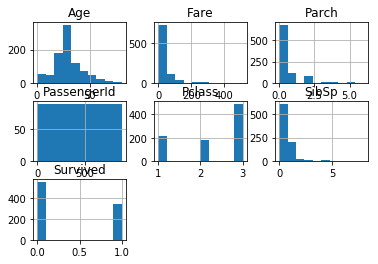

In [40]:
%matplotlib inline

import matplotlib.pyplot as plt 
df.hist()

([array([  3.,  15.,  90.,  34.,  36.,  41.,  39.,  18.,  16.,   5.]),
  array([  1.,  10.,  83.,  50.,  24.,  24.,  47.,  24.,  23.,  11.]),
  array([   2.,    7.,  103.,   56.,   31.,   15.,   36.,   30.,   17.,    0.])],
 array([-0.27746285, -0.1328922 ,  0.01167845,  0.15624909,  0.30081974,
         0.44539039,  0.58996104,  0.73453169,  0.87910234,  1.02367299,
         1.16824364]),
 <a list of 3 Lists of Patches objects>)

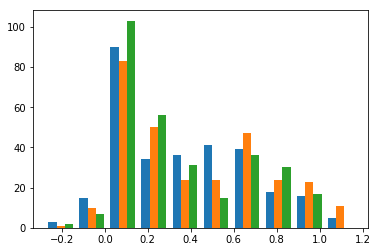

In [41]:
plt.hist(predictions)

In [42]:
print(len(predictions[0]))
print(len(predictions[1]))
print(len(predictions[2]))

297
297
297


In [67]:
predictions = np.concatenate(predictions, axis=0)

In [81]:
predictions[predictions > 0.5] = 1
predictions[predictions <= 0.5] = 0

accuracy = sum(predictions == df['Survived'])/len(predictions)

In [82]:
print(accuracy)

0.783389450056


In [70]:
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier

alg = RandomForestClassifier(random_state=1, n_estimators=10, min_samples_split=2, min_samples_leaf=1)
kf = KFold(df.shape[0], n_folds=3, random_state=1)
scores = cross_validation.cross_val_score(alg, df[predictors], df['Survived'], cv=kf)

In [72]:
print(scores.mean())

0.785634118967


In [74]:
alg = RandomForestClassifier(random_state=1, n_estimators=100, min_samples_split=4, min_samples_leaf=2)
kf = KFold(df.shape[0], n_folds=3, random_state=1)
scores = cross_validation.cross_val_score(alg, df[predictors], df['Survived'], cv=kf)
print(scores.mean())

0.814814814815
